In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X_train = pd.read_csv(r"C:\Users\pujit\OneDrive\Desktop\PYTHON\DATASET\Training Logistic\Logistic_X_Train.csv")
Y_train = pd.read_csv(r"C:\Users\pujit\OneDrive\Desktop\PYTHON\DATASET\Training Logistic\Logistic_Y_Train.csv")

In [3]:
X_train = X_train.values
Y_train= Y_train.values

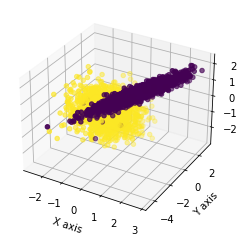

In [55]:
fig = plt.figure()
axes= fig.gca(projection = "3d")
axes.scatter(X_train[:,0],X_train[:,1],X_train[:,2],c=Y_train)

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [4]:
mean = np.mean(X_train,axis=0)
std = np.std(X_train, axis =0)

In [5]:
X_train = (X_train-mean)/std


In [6]:
X_train[:5,:]

array([[-0.93471307, -0.24439694, -0.46140414],
       [-0.7823013 , -0.19327286, -1.08586573],
       [-0.46707053,  0.56681072, -1.17534766],
       [ 0.99595846,  0.34128188,  1.16101187],
       [ 0.48839071,  0.29377517,  0.44826784]])

In [7]:
X_train.shape

(3000, 3)

In [39]:
def sigmoid(V):
    return 1.0/(1+np.exp(-V))
    
def hypo(X,theta):
    return sigmoid(np.dot(X,theta))

In [40]:
def error(X,y,theta):
    hi = hypo(X,theta)
    
    e = -1 *np.mean((y*np.log(hi)+(1-y)*np.log(1-hi)))
    
    return e
    

In [41]:
def gradient(X,Y,theta):
    hi = hypo(X,theta)
    grad = -np.dot(X.T,(Y-hi))
    m = X.shape[0]
    
    return grad/m


In [42]:
def gradient_descent(X,y,lr=0.5,max_Itr=500):
    
    n = X.shape[1]
    
    theta = np.zeros((n,1))

    error_list= []
    prev=100
    for i in range(max_Itr):
        e = error(X,y,theta)
        
        if(prev-e<0.00001):
            break
        
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta - lr*(grad)
        prev=e
    
    return theta,error_list    


In [43]:
X_train.shape[0]

3000

In [44]:
ones = np.ones((X_train.shape[0],1))
X_New_train = np.hstack((ones , X_train))

In [45]:
theta , errorlist= gradient_descent(X_train, Y_train)

In [48]:
X_test = pd.read_csv(r"C:\Users\pujit\OneDrive\Desktop\PYTHON\DATASET\Test Logistic\Logistic_X_Test.csv")

In [49]:
X_test = (X_test-np.mean(X_test, axis=0))/np.std(X_test,axis=0)

In [50]:
print(theta)

[[-3.85337646]
 [ 2.65185236]
 [-2.9879465 ]]


In [51]:
Y_test = hypo(X_test,theta)

In [62]:
Y_test[Y_test>=0.5]=1
Y_test[Y_test<0.5]=0

In [63]:
df = pd.DataFrame(data=Y_test,columns=["label"])

In [64]:
df.to_csv("Y_test.csv",index=False)